In [1]:

import numpy as np            
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [2]:

dataset = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-06/bt1.csv')
X = dataset.iloc[:,[3,4]].values



### 1. Dùng thư viện sch.dendrogram để vẽ ra dendrogram chọn ra số cụm thích hợp và dùng hierachical để gom cụm lại.

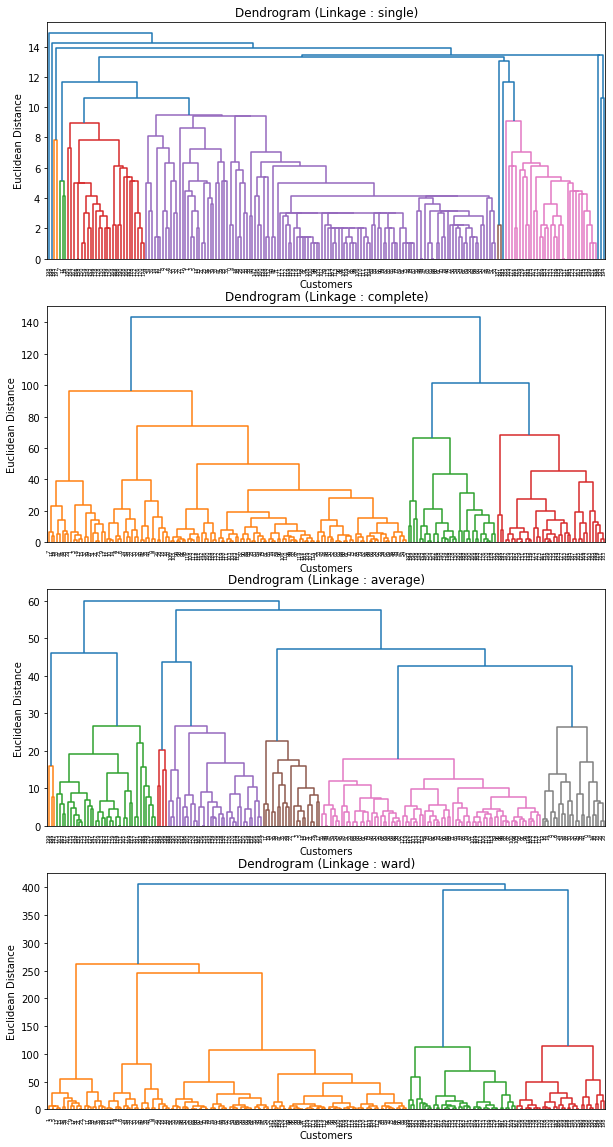

In [3]:
fig, axes = plt.subplots(nrows = 4 , ncols  = 1, figsize = (10,20))
list_linkages = ['single', 'complete', 'average', 'ward']

for i in range(4):
    dendrogram = sch.dendrogram(sch.linkage(X, method = list_linkages[i]), ax = axes[i])
    linkage = '(Linkage : ' +  list_linkages[i] +  ')'
    axes[i].set_title('Dendrogram ' + linkage)
    axes[i].set_xlabel('Customers')
    axes[i].set_ylabel('Euclidean Distance')

Dựa vào biểu đồ dendrogram ở trên , ta sẽ chọn threshold sao cho khoảng cách giữa các cụm là đủ xa để mỗi cụm sẽ có mỗi đặc tính khác nhau để có thể phân biệt được. 

In [4]:
# threshold cho từng phương pháp linkage khác nhau 
threshold = [13.5,80,44,251]

# 13.5 cho single
# 80 cho complete
# 44 cho average 
# 251 cho ward


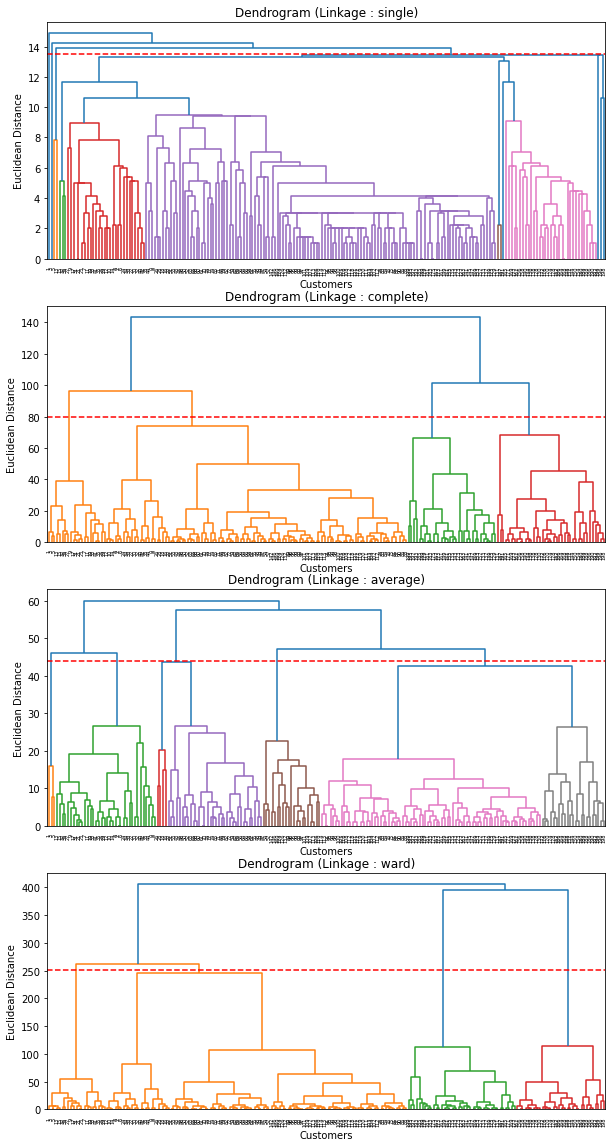

In [5]:
fig, axes = plt.subplots(nrows = 4 , ncols  = 1, sharex = True, figsize = (10,20))
list_linkages = ['single', 'complete', 'average', 'ward']


for i in range(4):
    
    dendrogram = sch.dendrogram(sch.linkage(X, method = list_linkages[i]), ax = axes[i])
    axes[i].axhline(y=threshold[i], color='r', linestyle='--')
    linkage = '(Linkage : ' +  list_linkages[i] +  ')'
    axes[i].set_title('Dendrogram ' + linkage)
    axes[i].set_xlabel('Customers')
    axes[i].set_ylabel('Euclidean Distance')

In [6]:

list_linkages = ['single', 'complete', 'average', 'ward']

for i in range(4):
    model = AgglomerativeClustering(n_clusters = None , 
                                    affinity='euclidean', 
                                    linkage= list_linkages[i],
                                    distance_threshold= threshold[i])
    model.fit(X)
    labels = model.labels_
    print("Label of data using Hierarchical Clustering with {} linkage : \n {}".format(list_linkages[i].upper(),labels))

Label of data using Hierarchical Clustering with SINGLE linkage : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 3 2]
Label of data using Hierarchical Clustering with COMPLETE linkage : 
 [0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Label of data using Hierarchical Clustering with

### 2. Vẽ hình biểu diễn các cụm

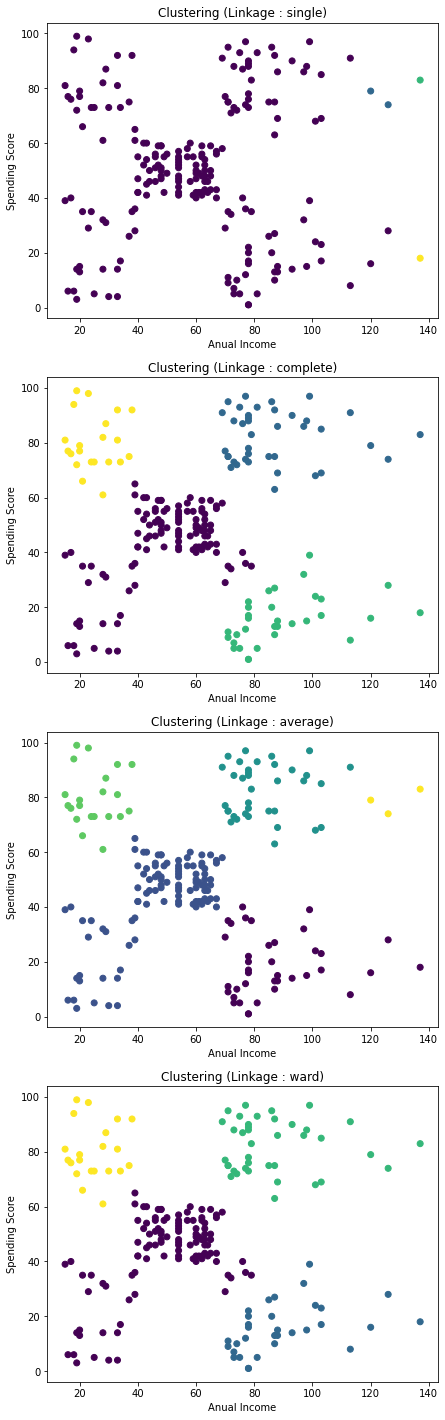

In [7]:
fig, axes = plt.subplots(nrows = 4 , ncols  = 1, figsize = (7,25))
list_linkages = ['single', 'complete', 'average', 'ward']

for i in range(4):
    model = AgglomerativeClustering(n_clusters = None , 
                                    affinity='euclidean', 
                                    linkage= list_linkages[i],
                                    distance_threshold= threshold[i])
    model.fit(X)
    labels = model.labels_
    axes[i].scatter(X[:,0], X[:,1], c = labels)
    linkage = '(Linkage : ' +  list_linkages[i] +  ')'
    axes[i].set_title('Clustering ' + linkage)
    axes[i].set_xlabel('Anual Income')
    axes[i].set_ylabel('Spending Score')
